<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
#!pip install --upgrade seaborn

In [39]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 50,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False,
            'float_format': lambda x: '%.3f' % x
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+
start()

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [47]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [48]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [49]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [50]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [51]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [52]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_perce...,NaN,measure,The estimated percent...,NaN,NaN,NaN,NaN,"Adults with HIV (%, a...","Adults with HIV (%, a...",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder...,hiv
1,age_at_1st_marriage_w...,NaN,measure,"The mean age, in year...",NaN,NaN,NaN,NaN,Age at 1st marriage (...,Age at 1st marriage (...,Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder...,population
2,aged_15_24_employment...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 employment...,Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,employment_rate
3,aged_15_24_unemployme...,NaN,measure,Percentage of total p...,NaN,NaN,NaN,NaN,Aged 15-24 unemployme...,Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,unemployment
4,aged_15_64_labour_for...,NaN,measure,"For age group 15-64, ...",NaN,NaN,NaN,NaN,Aged 15-64 labour for...,Aged 15-64,Labour force particip...,"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/i...,labour_force_particip...


In [0]:
csv_dict = {'income': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv',
            'lifespan': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv',
            'population': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv',
            'entities': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv',
            'concepts': 'https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv'            
}

dfs = {}

for k in csv_dict:
  dfs[k] = pd.read_csv(csv_dict[k])

## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [54]:
dfs['income'].head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [55]:
dfs['lifespan'].head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [56]:
dfs['population'].head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [57]:
dfs['entities'].head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.5000,-69.9667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of A...,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0000,66.0000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.5000,18.5000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.2167,-63.0500,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [58]:
dfs['entities'].head(4).T

,0,1,2,3
country,abkh,abw,afg,ago
alt_5,NaN,NaN,NaN,NaN
alternative_1,NaN,NaN,Islamic Republic of A...,NaN
alternative_2,NaN,NaN,NaN,NaN
alternative_3,NaN,NaN,NaN,NaN
alternative_4_cdiac,NaN,Aruba,Afghanistan,Angola
arb1,NaN,NaN,NaN,NaN
arb2,NaN,NaN,NaN,NaN
arb3,NaN,NaN,NaN,NaN
arb4,NaN,NaN,NaN,NaN


In [0]:
pd.merge?

In [0]:
df = pd.merge(dfs['income'], dfs['lifespan'])
df = pd.merge(df, dfs['population'])

In [61]:
# Another method of merging dataframes
df_v2 = dfs['income'].merge(dfs['lifespan']).merge(dfs['population'])
df_v2.sample(10)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
29408,prk,1940,1418,47.68,8870436
39370,wsm,1828,1443,25.40,47075
27370,npl,1873,675,32.95,4823332
11428,esp,1965,9013,70.68,32241041
28732,phl,1921,2077,31.47,9592031
14436,gnq,1907,416,31.04,107703
28953,png,1923,799,34.40,1410050
5052,bra,1987,11281,67.69,141273488
2743,ben,1868,754,31.00,1018026
34377,swz,1872,631,32.34,86651


In [62]:
df.equals(df_v2)

True

In [63]:
dfs['entities'][['country', 'name', 'world_6region']].sample(5)

,country,name,world_6region
261,vir,Virgin Islands (U.S.),america
28,blr,Belarus,europe_central_asia
199,pyf,French Polynesia,east_asia_pacific
200,qat,Qatar,middle_east_north_africa
226,stp,Sao Tome and Principe,sub_saharan_africa


In [64]:
df = pd.merge(df, dfs['entities'][['country', 'name', 'world_6region']], left_on='geo', right_on='country')
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [65]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [66]:
col_name_map = {
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'   
}
df = df.rename(columns=col_name_map)
df.head()

,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [67]:
df.shape

(40437, 6)

## Explore data

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [69]:
df.dtypes

year            int64
income          int64
lifespan      float64
population      int64
country        object
region         object
dtype: object

In [74]:
df.describe()

,year,income,lifespan,population
count,40437.000,40437.000,40437.000,40437.000
mean,1909.293,4619.493,43.132,13712042.573
std,63.309,10209.571,16.313,66063348.915
min,1800.000,247.000,1.000,2128.000
25%,1854.000,876.000,31.160,411331.000
50%,1909.000,1442.000,35.500,1985952.000
75%,1964.000,3488.000,55.970,6499707.000
max,2018.000,177522.000,84.170,1415045928.000


In [71]:
df[df['lifespan'] ==1]

,year,income,lifespan,population,country,region
12214,1875,949,1.0,128811,Fiji,east_asia_pacific


In [76]:
df.describe(exclude=np.number)

,country,region
count,40437,40437
unique,187,6
top,Jordan,europe_central_asia
freq,219,10778


In [77]:
df['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [78]:
df['country'].nunique()

187

In [79]:
df[df['year'] >= 2000].describe()

,year,income,lifespan,population
count,3547.000,3547.000,3547.000,3547.000
mean,2008.986,15994.408,69.973,36647086.352
std,5.471,18919.603,8.865,136524548.570
min,2000.000,504.000,32.110,52055.000
25%,2004.000,2868.500,64.000,2113464.500
50%,2009.000,8977.000,72.030,8229629.000
75%,2014.000,21954.500,76.765,24907906.000
max,2018.000,129350.000,84.170,1415045928.000


In [84]:
usa = df[df['country'] == 'United States']
usa[usa['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
38046,1818,2258,39.410,9879049,United States,america
38146,1918,9371,47.180,106721812,United States,america
38246,2018,54898,79.140,326766748,United States,america


In [83]:
usa['year'].isin([1850, 1950])

38028    False
38029    False
38030    False
38031    False
38032    False
38033    False
38034    False
38035    False
38036    False
38037    False
38038    False
38039    False
38040    False
38041    False
38042    False
38043    False
38044    False
38045    False
38046    False
38047    False
38048    False
38049    False
38050    False
38051    False
38052    False
         ...  
38222    False
38223    False
38224    False
38225    False
38226    False
38227    False
38228    False
38229    False
38230    False
38231    False
38232    False
38233    False
38234    False
38235    False
38236    False
38237    False
38238    False
38239    False
38240    False
38241    False
38242    False
38243    False
38244    False
38245    False
38246    False
Name: year, dtype: bool

In [85]:
china = df[df['country'] == 'China']
china[china['year'].isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.000,374161494,China,east_asia_pacific
6954,1918,989,22.130,462444535,China,east_asia_pacific
7054,2018,16018,76.920,1415045928,China,east_asia_pacific


## Plot visualization

In [86]:
now = df[df['year'] == 2018]
now.shape

(184, 6)

In [87]:
now.sample(10)

,year,income,lifespan,population,country,region
21774,2018,2960,51.120,2263010,Lesotho,sub_saharan_africa
19584,2018,3832,69.350,16245729,Cambodia,east_asia_pacific
22212,2018,99034,82.390,590321,Luxembourg,europe_central_asia
22869,2018,5330,72.410,4041065,Moldova,europe_central_asia
3112,2018,1710,61.600,19751651,Burkina Faso,sub_saharan_africa
13671,2018,4375,66.620,29463643,Ghana,sub_saharan_africa
21117,2018,18254,75.470,6470956,Libya,middle_east_north_africa
35180,2018,1855,60.520,15353184,Chad,sub_saharan_africa
23088,2018,1455,63.400,26262810,Madagascar,sub_saharan_africa
1141,2018,18942,76.970,44688864,Argentina,america


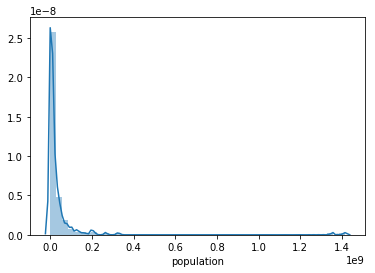

In [89]:
sns.distplot(now['population']);

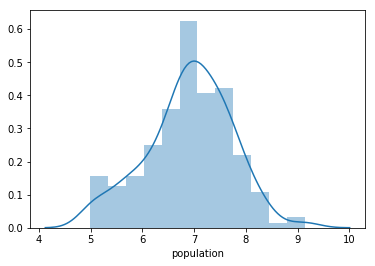

In [90]:
sns.distplot(np.log10(now['population']));

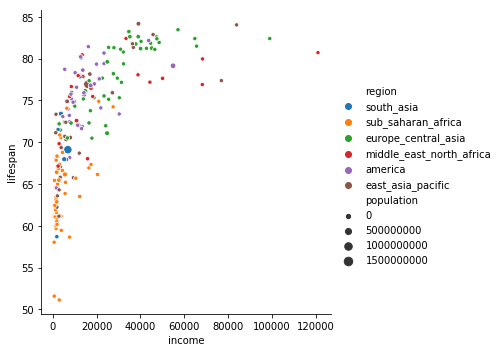

In [92]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

## Analyze outliers

In [93]:
now[now['income'] > 80000].sort_values('income')

,year,income,lifespan,population,country,region
31895,2018,83888,84.030,5791901,Singapore,east_asia_pacific
22212,2018,99034,82.390,590321,Luxembourg,europe_central_asia
30362,2018,121033,80.710,2694849,Qatar,middle_east_north_africa


In [94]:
now[now['income'] < 1000].sort_values('income')

,year,income,lifespan,population,country,region
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
2455,2018,691,61.140,11216450,Burundi,sub_saharan_africa
7711,2018,751,62.420,84004989,"Congo, Dem. Rep.",sub_saharan_africa
20898,2018,801,65.430,4853516,Liberia,sub_saharan_africa
26420,2018,949,62.450,22311375,Niger,sub_saharan_africa


In [95]:
now[now['lifespan'] < 60].sort_values('lifespan')

,year,income,lifespan,population,country,region
21774,2018,2960,51.120,2263010,Lesotho,sub_saharan_africa
6178,2018,689,51.580,4737423,Central African Republic,sub_saharan_africa
32771,2018,629,58.030,15181925,Somalia,sub_saharan_africa
34523,2018,7604,58.640,1391385,Swaziland,sub_saharan_africa
218,2018,1867,58.690,36373176,Afghanistan,south_asia
40217,2018,3865,59.450,17609178,Zambia,sub_saharan_africa
14328,2018,1547,59.660,1907268,Guinea-Bissau,sub_saharan_africa


In [0]:
 def plot_annotate_country(country_name, text_ann):
    country = now[now['country'] == country_name]
    country_income = country['income'].values[0]
    country_lifespan =country['lifespan'].values[0]
    sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
    plt.text(x=country_income-5000, y=country_lifespan+1, s=country_name)
    plt.title(f'{country_name} {text_ann}')

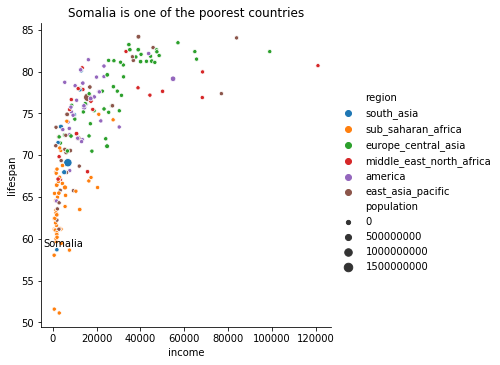

In [99]:
country_name = 'Somalia'
text_ann = 'is one of the poorest countries'
plot_annotate_country(country_name, text_ann)

## Plot multiple years

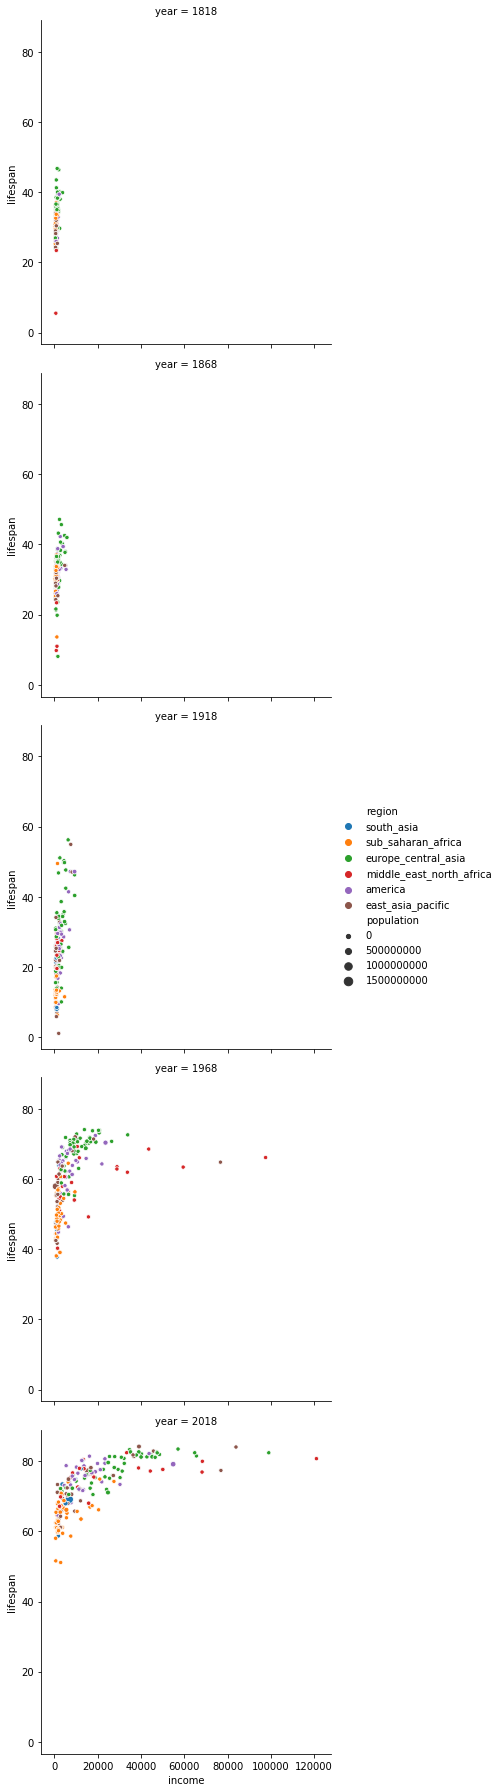

In [100]:
sns.relplot(x='income',
            y='lifespan',
            hue='region',
            size='population',
            data=df[df['year'].isin(range(1818, 2019, 50))],
            row='year')

## Point out a story

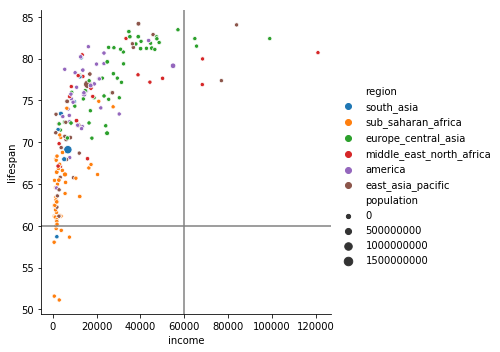

In [101]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)
plt.axhline(y=60, color='grey')
plt.axvline(x=60000, color='grey')

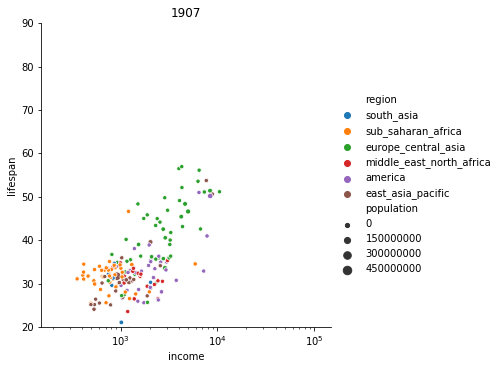

In [104]:
year = 1907 #@param {type:"slider", min:1800, max:2018, step:1}
sns.relplot(x='income', y='lifespan', hue='region', size='population',
            data=df[df.year==year])
plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20,90))
plt.title(year);


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

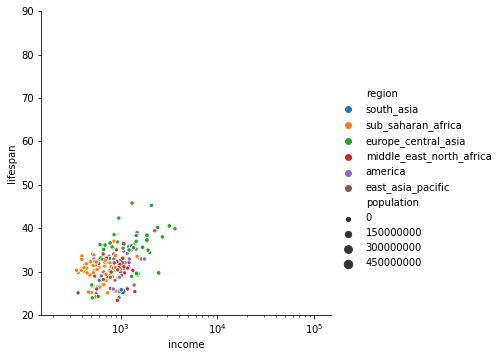

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

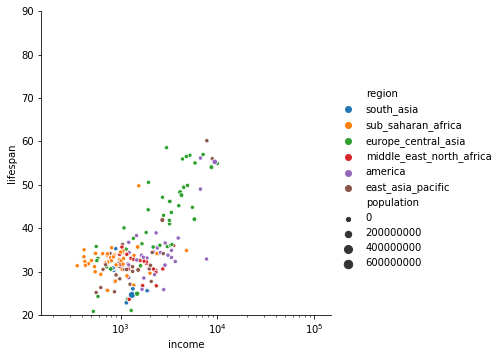

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

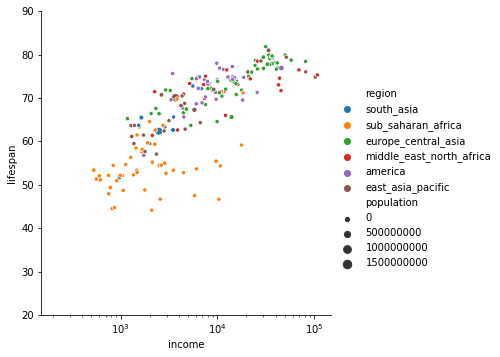

<IPython.core.display.Javascript object>

In [105]:
from google.colab import widgets

years = [1819, 1919, 2000]
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project